# Hepatitis C Prediction

## Introduction

Hepatitis C is a liver disease caused by the Hepatitis C virus (HCV). This disease can lead to serious liver problems like chronic liver disease, liver fibrosis (where the normal liver structure changes), cirrhosis, and even liver cancer. This study looks at data from Hepatitis C patients and healthy blood donors, including various biochemical and body measurements. The clinical measures in the data set include Albumin (ALB), Alkaline Phosphatase (ALP), Alanine Transaminase (ALT), Aspartate Transaminase (AST), Bilirubin (BIL), Cholinesterase (CHE), Cholesterol (CHOL), Creatinine (CREA), Gamma-Glutamyl Transferase (GGT), and Protein (PROT).

The goal of this analysis is to:

- The distribution of various clinical measures should also be understood.
- Relationships between these measures and different health conditions should also be studied.
- Perform statistical tests and use a machine learning algorithm to predict the health conditions using these measures.



In [66]:
import pandas as pd
import numpy as np

# Loading the dataset
df=pd.read_csv('/kaggle/input/hepatitis-c-dataset/HepatitisCdata.csv')

In [67]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


### Here each columns mean:
- Unnamed define as row numbers
- Category define as types of patients.
- Age
- Sex
- ALB means Albumine Blood Test
- ALP means Alkaline phosphatase
- ALT means Alanine Transaminase
- AST means Aspartate Transaminase
- BIL means Bilirubin
- CHE means Cholinesterase
- CHOL means Cholesterol level
- CREA means Creatinine level
- GGT means Gamma-glutamyl transferase level
- PROT means Total protein level

In [68]:
df.drop(columns="Unnamed: 0",inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [70]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [72]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [73]:
df.Category

0      0=Blood Donor
1      0=Blood Donor
2      0=Blood Donor
3      0=Blood Donor
4      0=Blood Donor
           ...      
610      3=Cirrhosis
611      3=Cirrhosis
612      3=Cirrhosis
613      3=Cirrhosis
614      3=Cirrhosis
Name: Category, Length: 615, dtype: object

In [74]:
df.Category.unique().tolist()

['0=Blood Donor',
 '0s=suspect Blood Donor',
 '1=Hepatitis',
 '2=Fibrosis',
 '3=Cirrhosis']

In [75]:
df.Category.value_counts()

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

In [76]:
df.replace('0s=suspect Blood Donor','0=Blood Donor',inplace=True)

In [77]:
df.Category.value_counts()

Category
0=Blood Donor    540
3=Cirrhosis       30
1=Hepatitis       24
2=Fibrosis        21
Name: count, dtype: int64

In [78]:
import pandas as pd
import numpy as np

# Loading the dataset
file_path = '/kaggle/input/hepatitis-c-dataset/HepatitisCdata.csv'
data = pd.read_csv(file_path)

# Handling missing values
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Checking for missing values before filling
missing_values = data.isnull().sum()
print("Missing values before cleaning:\n", missing_values)

Missing values before cleaning:
 Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


In [79]:
df = data.copy()
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


### Data Cleaning

Handling Missing Values and Data Type Conversion

I handle any missing or infinite values in the dataset to ensure that our analysis is accurate and reliable.

In [80]:
# Selecting numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Filling missing values in numeric columns with the mean
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Converting 'Category' and 'Sex' to categorical types
data['Category'] = data['Category'].astype('category')
data['Sex'] = data['Sex'].astype('category')

# Verifying no missing values remain
missing_values_after = data.isnull().sum()
print("Missing values after cleaning:\n", missing_values_after)

Missing values after cleaning:
 Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64


## Exploratory Data Analysis 
#### Distribution of Age and Gender
I visualize the distribution of age and gender to understand the demographics of the dataset.

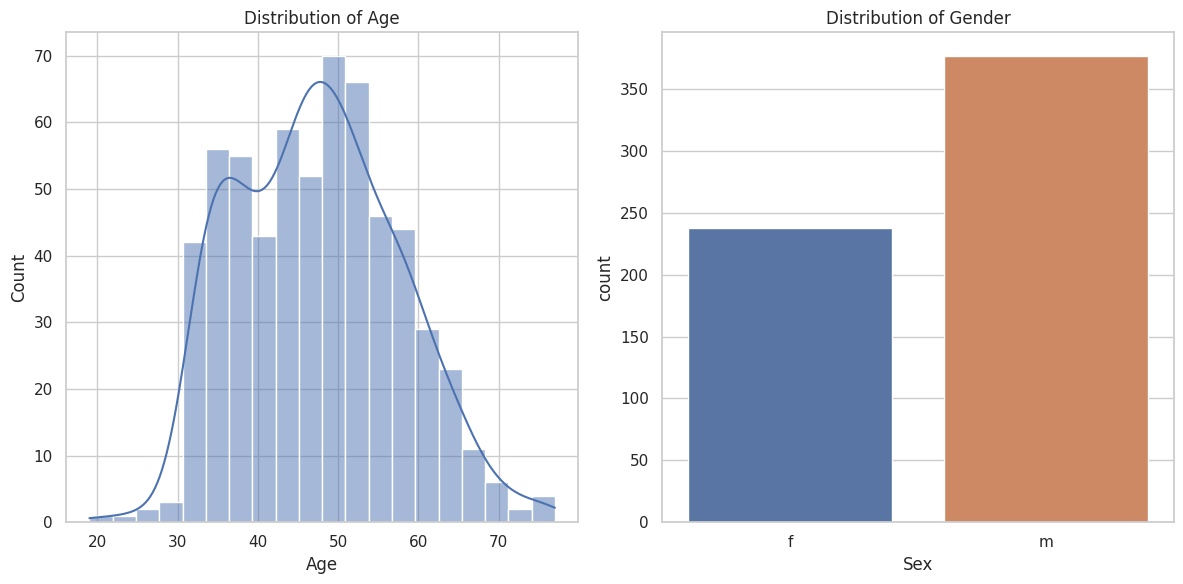

In [19]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Set plot style
sns.set(style="whitegrid")

# Plot distribution of Age
plt.figure(figsize=(12, 6))

# Subplot 1: Distribution of Age
plt.subplot(1, 2, 1)
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

# Subplot 2: Distribution of Sex
plt.subplot(1, 2, 2)
sns.countplot(x='Sex', data=data)
plt.title('Distribution of Gender')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

- Age Distribution: Most individuals in the dataset are aged between 40 and 60, with a few younger and older individuals.
- Gender Distribution: There are more male participants than female participants in the dataset

## Pie Charts for Categorical Variables

Pie charts provide a simple way to visualize the proportion of different categories within a variable.

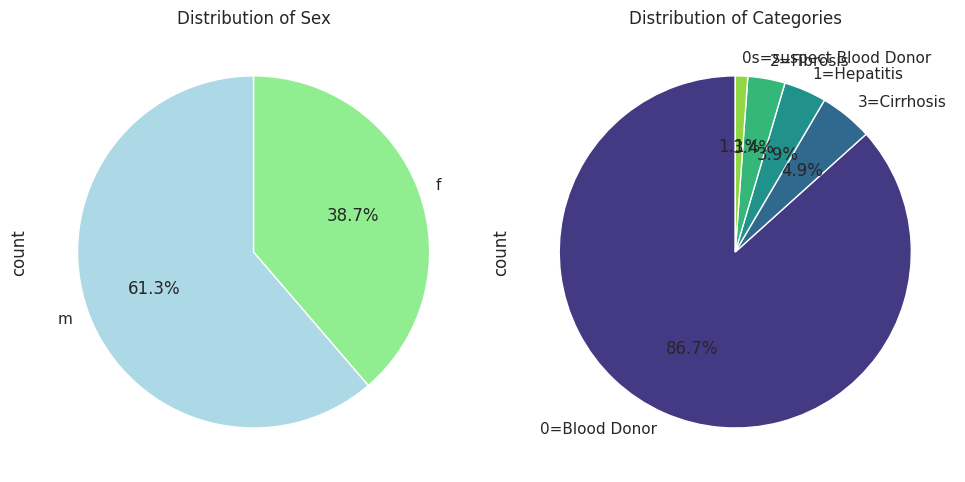

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pie chart for 'Sex'
plt.figure(figsize=(10, 5))

# Plot for 'Sex'
plt.subplot(1, 2, 1)
data['Sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Sex')

# Plot for 'Category'
plt.subplot(1, 2, 2)
data['Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(data['Category'].unique())))
plt.title('Distribution of Categories')

plt.tight_layout()
plt.show() 

* 0 = Blood Donor:
  -	This category represents healthy blood donors. These individuals do not show any signs of hepatitis C or liver disease, indicating they are healthy.
* 0s = Suspect Blood Donor:
  -	This category represents suspect blood donors. These individuals are blood donors but may have some abnormalities or potential health issues.
* 1 = Hepatitis:
  -	This category represents hepatitis C patients. Hepatitis C is a viral infection that affects the liver.
* 2 = Fibrosis:
  -	This category represents liver fibrosis. Fibrosis is the formation of scar tissue in the liver due to damage, which can impair liver function.
* 3 = Cirrhosis:
  -	This category represents cirrhosis. Cirrhosis is an advanced stage of liver disease characterized by severe liver damage and scarring, often due to chronic liver disease progression.

## Distribution of Clinical Measures

We visualize the distribution of various clinical measures to understand their variability and detect any potential outliers.

### Box Plots for Each Clinical Measure

Box plots provide a clear view of the distribution of each clinical measure across different categories.

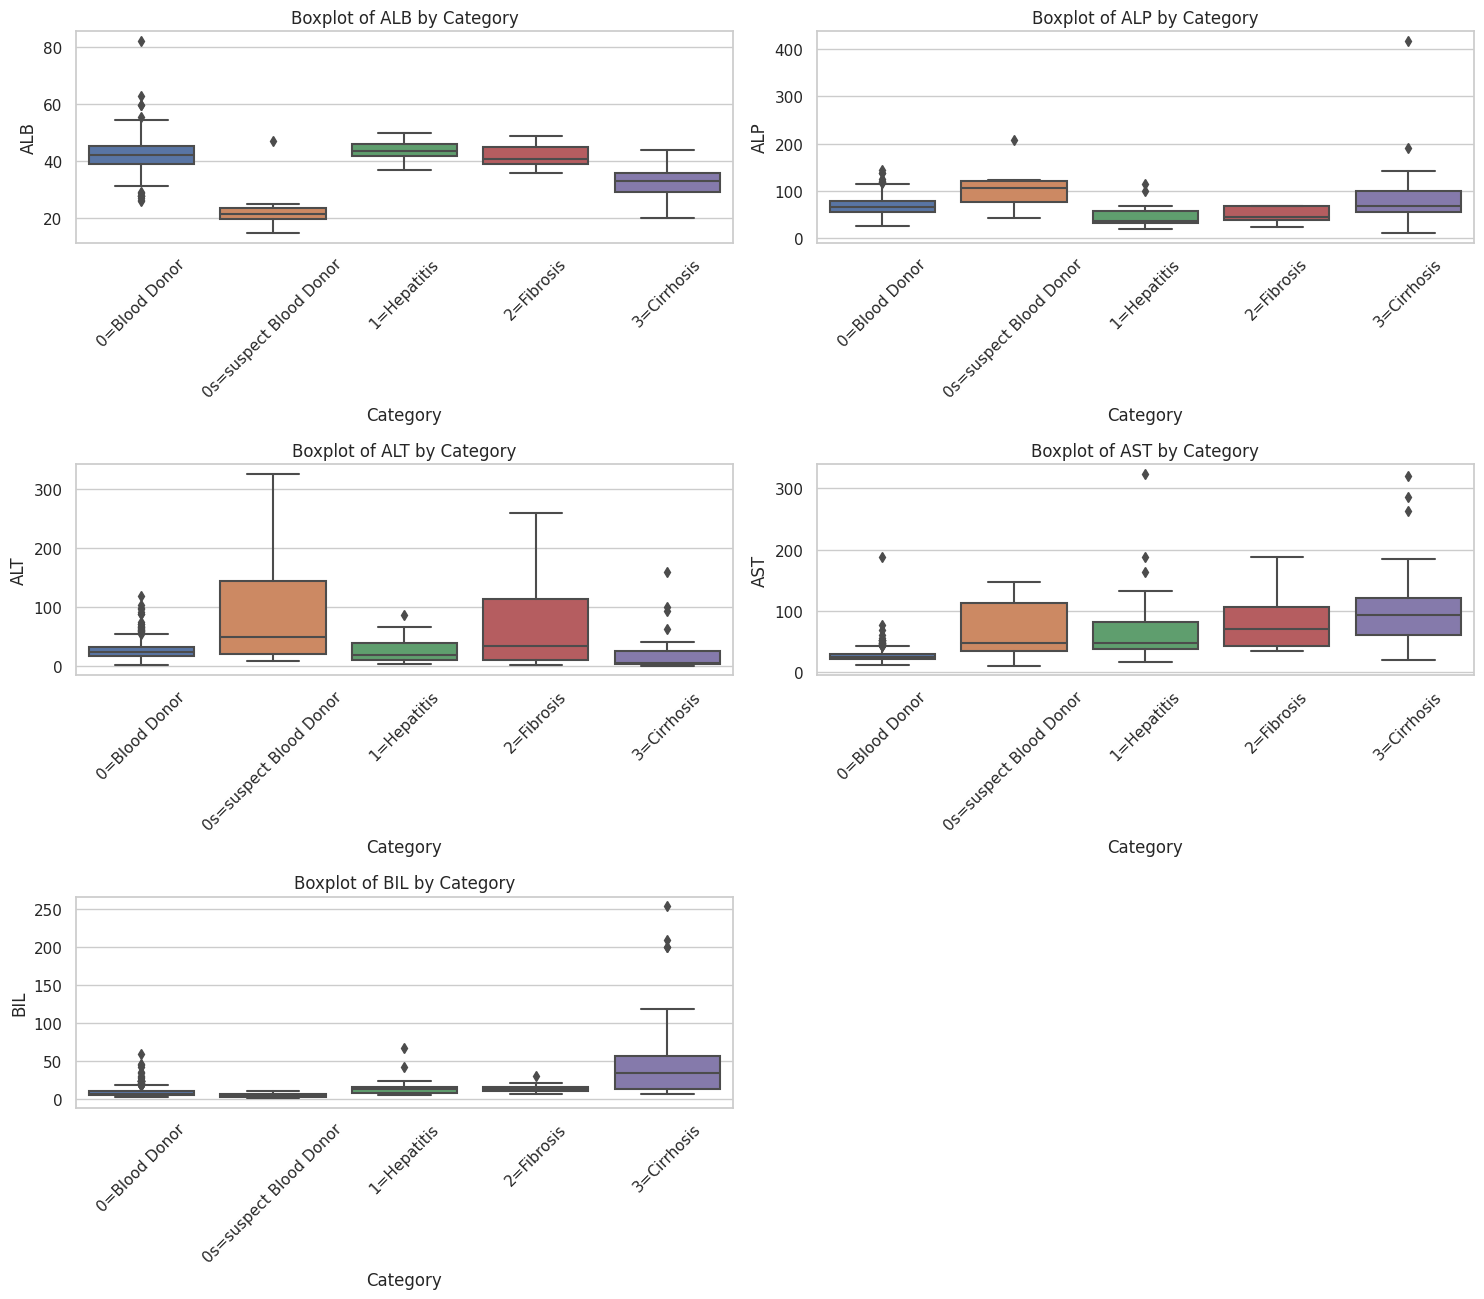

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# List of clinical columns
clinical_columns = ['ALB', 'ALP', 'ALT', 'AST', 'BIL']

# Plotting boxplots for each clinical measure
plt.figure(figsize=(15, 20))
for i, column in enumerate(clinical_columns, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x='Category', y=column, data=data)
    plt.title(f'Boxplot of {column} by Category')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Low ALB levels are associated with liver diseases (hepatitis, fibrosis, cirrhosis). This may reflect impaired albumin production by the liver.

- High ALP levels indicate liver diseases, especially bile duct obstruction or liver tissue damage.

- High ALT and AST levels are indicative of liver cell damage. These enzymes are elevated in hepatitis and other liver diseases.

- High BIL levels indicate the liver’s impaired ability to process bilirubin, often associated with liver diseases._

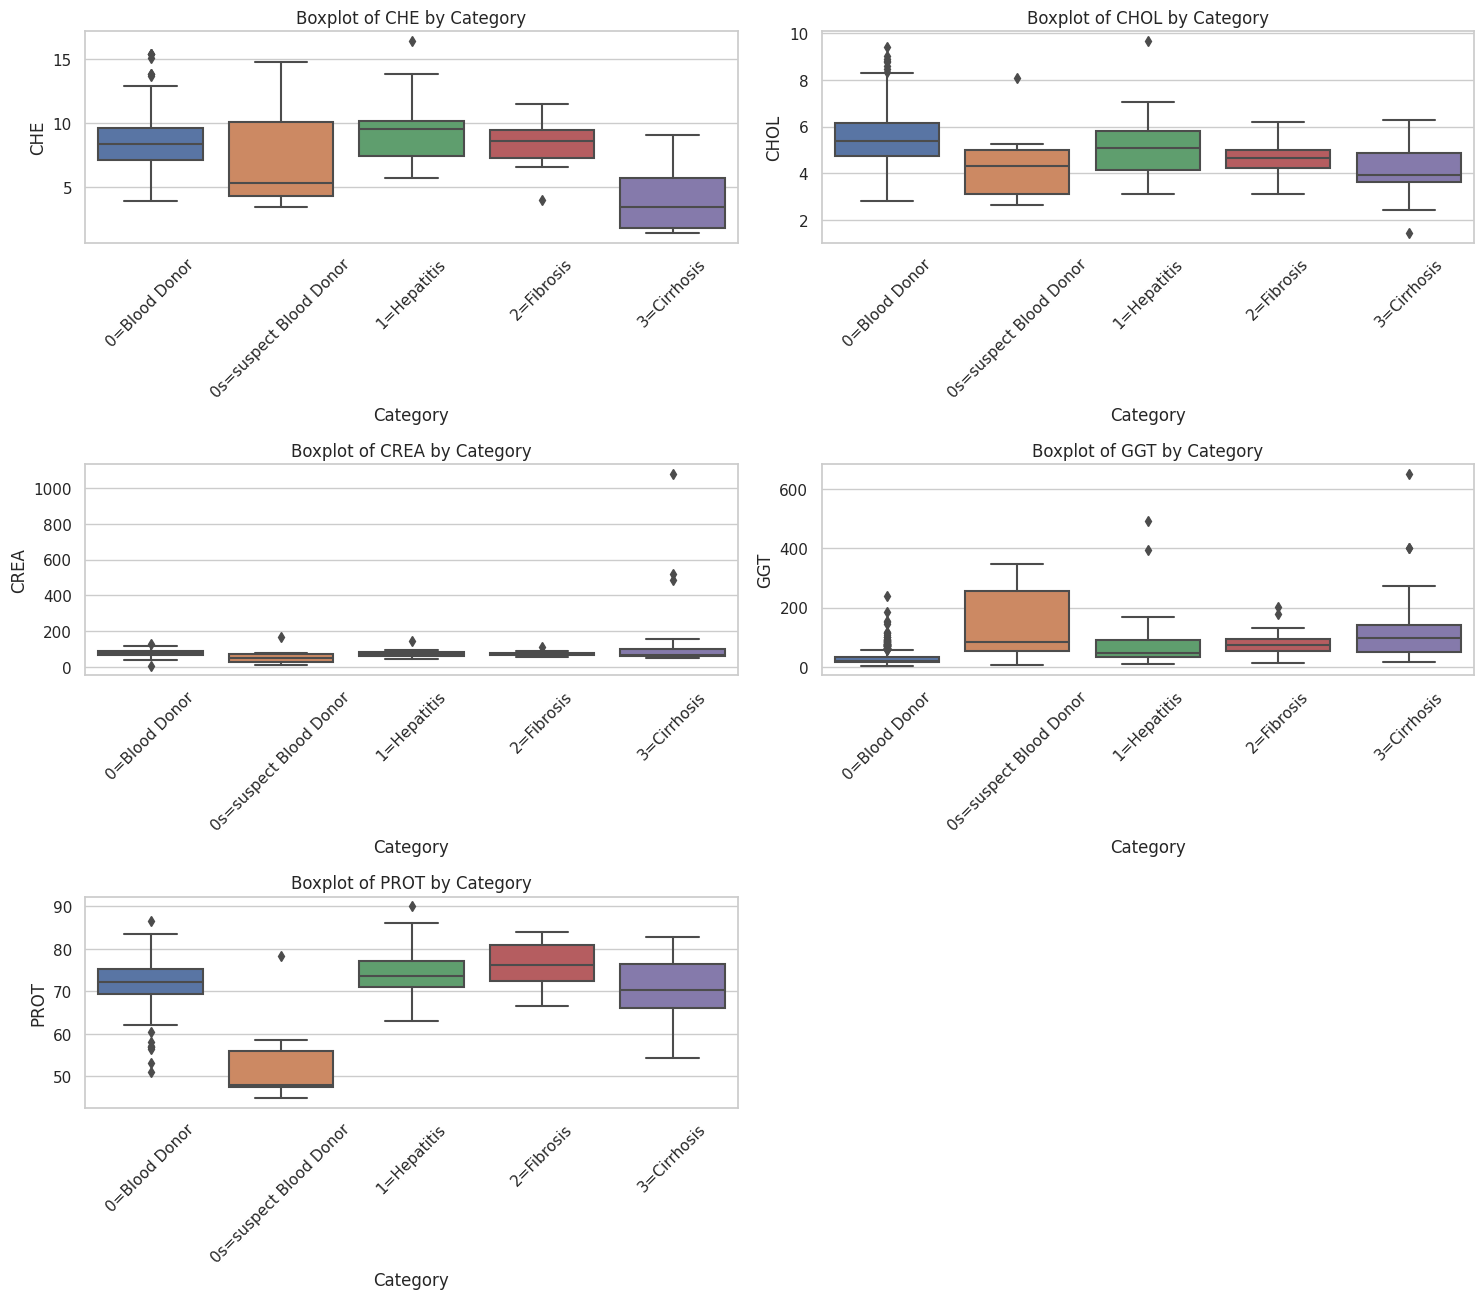

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppressing the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Listing of clinical columns
clinical_columns = ['CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Plotting boxplots for each clinical measure
plt.figure(figsize=(15, 20))
for i, column in enumerate(clinical_columns, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x='Category', y=column, data=data)
    plt.title(f'Boxplot of {column} by Category')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Low CHE levels may reflect liver dysfunction. Cholesterol levels are typically lower in liver diseases.

- Creatinine levels indicate kidney function and may not be directly associated with liver diseases.

- High GGT levels can indicate liver diseases and alcohol consumption.

- Low total protein levels indicate reduced protein production in liver diseases.

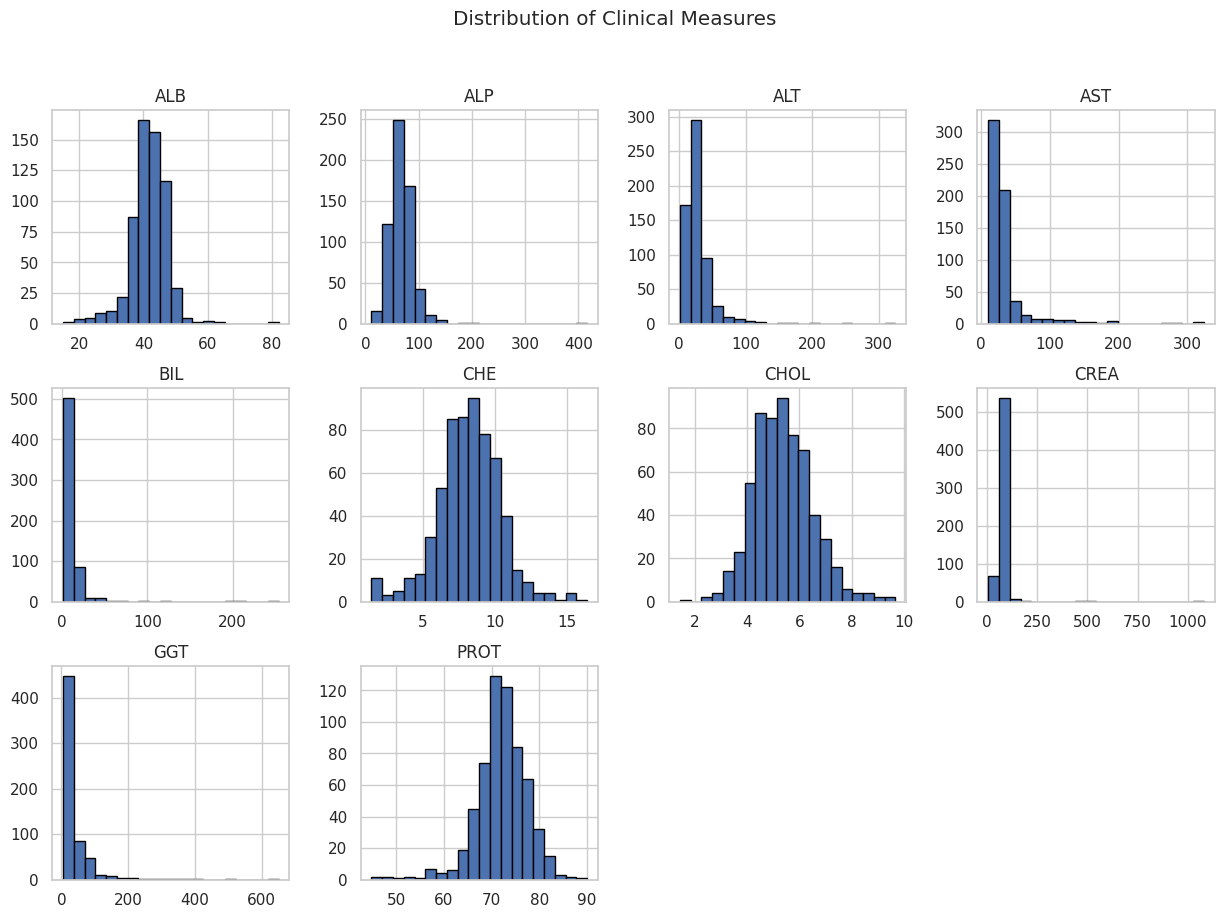

In [84]:
# Plot distribution of clinical measures
clinical_columns = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
data[clinical_columns].hist(figsize=(15, 10), bins=20, layout=(3, 4), edgecolor='black')
plt.suptitle('Distribution of Clinical Measures')
plt.show()

The distribution of these biochemical parameters provides significant insights into liver functions and disease states. Parameters like ALB, ALT, AST, and GGT are closely related to liver diseases and are typically found at abnormal levels in such conditions.

# Correlation matrix
We compute and visualize the correlation matrix to understand the relationships between different clinical measures.

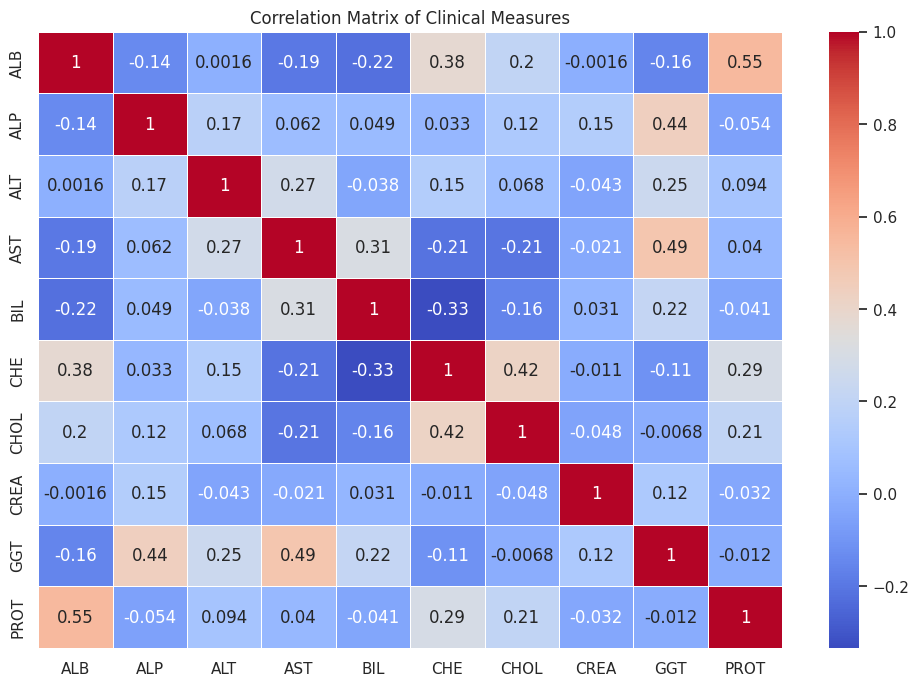

In [85]:
plt.figure(figsize=(12, 8))
corr_matrix = data[clinical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Clinical Measures')
plt.show()

- ALB and PROT: There is a moderate positive correlation (0.55) between Albumin and Protein levels, meaning when Albumin levels are high, Protein levels tend to be high as well.


To understand and verify the positive correlation between ALB and PROT:

### Pearson Correlation Analysis for ALB and PROT

In [86]:
from scipy.stats import pearsonr

# Ensure no missing values for the selected columns
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)

# Pearson correlation for ALB and PROT
pearson_corr, p_value = pearsonr(df['ALB'], df['PROT'])
print(f"Pearson correlation coefficient: {pearson_corr:.2f}, P-value: {p_value:.2e}")


Pearson correlation coefficient: 0.55, P-value: 6.39e-50


* The positive Pearson correlation coefficient indicates a moderate relationship between Albumin (ALB) and Protein (PROT) levels.
* A statistically significant P-value (<0.05) confirms this relationship is unlikely to occur by chance.

### Pearson Correlation Analysis for GGT and ALP

In [87]:
# Ensuring no missing values for the selected columns
df['GGT'].fillna(df['GGT'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)

# Pearson correlation for GGT and ALP
pearson_corr_ggt_alp, p_value_ggt_alp = pearsonr(df['GGT'], df['ALP'])
print(f"Pearson correlation coefficient (GGT and ALP): {pearson_corr_ggt_alp:.2f}, P-value: {p_value_ggt_alp:.2e}")


Pearson correlation coefficient (GGT and ALP): 0.44, P-value: 7.72e-31


* The moderate positive correlation (r ≈ 0.44) indicates that as Gamma-Glutamyl Transferase (GGT) increases, Alkaline Phosphatase (ALP) levels also tend to rise.
* The low P-value confirms the statistical significance of this relationship.

### Pearson Correlation Analysis for GGT and AST

In [88]:
# Calculate Pearson correlation coefficient for GGT and AST
pearson_corr_ggt_ast, p_value_ggt_ast = stats.pearsonr(df['GGT'], df['AST'])
print(f"Pearson correlation coefficient (GGT and AST): {pearson_corr_ggt_ast}")
print(f"P-value: {p_value_ggt_ast}")

Pearson correlation coefficient (GGT and AST): 0.49126254893393806
P-value: 1.1199119259033346e-38


- The weak positive correlation between GGT and AST, despite being statistically significant, indicates that these enzymes can provide complementary information about liver health. 
 - This relationship underscores the importance of using a panel of liver function tests for accurate diagnosis and monitoring of liver diseases, including Hepatitis C.

### Scatter Plot for ALB and PROT

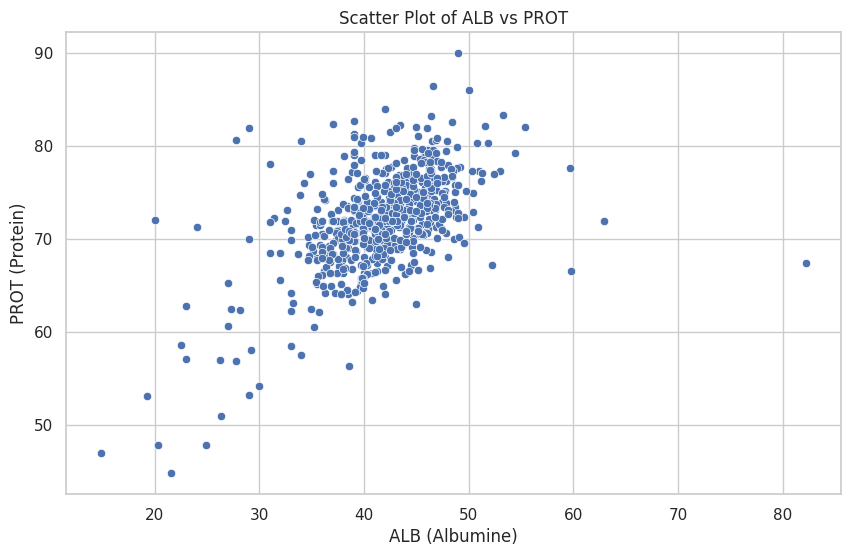

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ALB', y='PROT', data=df)
plt.title('Scatter Plot of ALB vs PROT')
plt.xlabel('ALB (Albumine)')
plt.ylabel('PROT (Protein)')
plt.show()

### Heatmap FOR for ALB and PROT


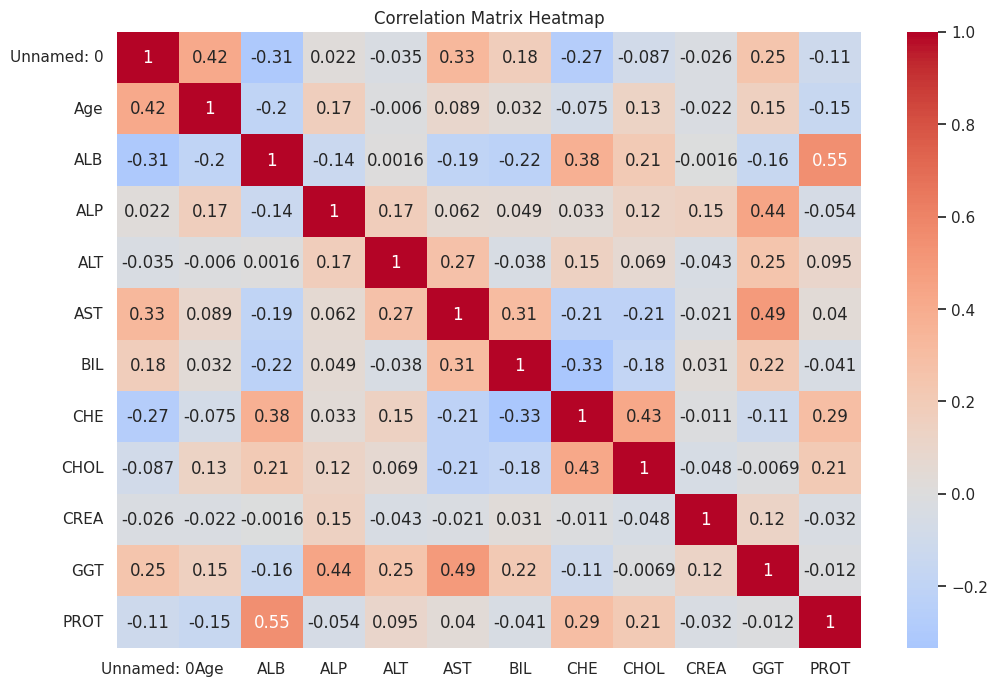

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Contingency Table 

In [93]:
import pandas as pd

# Create a contingency table showing the relationship between 'Category' and 'Sex'
contingency_table = pd.crosstab(data['Category'], data['Sex'])
print(contingency_table)

Sex                       f    m
Category                        
0=Blood Donor           215  318
0s=suspect Blood Donor    1    6
1=Hepatitis               4   20
2=Fibrosis                8   13
3=Cirrhosis              10   20


- 0=Blood Donor: This category has 215 female and 318 male participants, indicating that most blood donors are male.
- 0s=suspect Blood Donor: This category has very few participants (1 female and 6 male), indicating that there are few suspect blood donors.
- 1=Hepatitis: There are 4 female and 20 male hepatitis patients, indicating that hepatitis cases are more common in males.
- 2=Fibrosis: There are 8 female and 13 male fibrosis patients, again showing more males.
- 3=Cirrhosis: There are 10 female and 20 male cirrhosis patients, indicating that cirrhosis cases are also more common in males.

# Statistical Analyses 

### Logistic Regression

I use logistic regression to predict the health condition (category) of individuals based on their clinical measures.
By focusing on the logistic regression model and its ability to classify patients based on biochemical parameters, this analysis aims to provide insights into how these parameters can predict different health categories, which is crucial for understanding the liver function and overall health status of patients with Hepatitis C.

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# List of clinical columns
clinical_columns = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Encode the target variable
label_encoder = LabelEncoder()
data['Category_encoded'] = label_encoder.fit_transform(data['Category'])

# Define features and target variable for logistic regression
X = data[clinical_columns]
y = data['Category_encoded']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print("Logistic Regression Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Logistic Regression Accuracy: 0.8617886178861789
Confusion Matrix:
 [[96  0  0  0  0]
 [ 1  2  0  0  0]
 [ 3  0  1  4  1]
 [ 3  0  1  2  0]
 [ 2  1  0  1  5]]
Classification Report:
                         precision    recall  f1-score   support

         0=Blood Donor       0.91      1.00      0.96        96
0s=suspect Blood Donor       0.67      0.67      0.67         3
           1=Hepatitis       0.50      0.11      0.18         9
            2=Fibrosis       0.29      0.33      0.31         6
           3=Cirrhosis       0.83      0.56      0.67         9

              accuracy                           0.86       123
             macro avg       0.64      0.53      0.56       123
          weighted avg       0.84      0.86      0.84       123



- Accurarcy; The model correctly predicts the disease status 86.18% of the time, indicating good performance overall.
- the precision for Blood Donor is 0.91, indicating that when the model predicts Blood Donor, it is correct 91% of the time.
- the recall for Blood Donor is 1.00, indicating that the model correctly identifies all actual Blood Donors.
- the F1-score for Blood Donor is 0.96, indicating a high balance between precision and recall.
- The model performs exceptionally well in predicting healthy blood donors. It correctly identifies almost all Blood Donors with high precision and recall.
- The model has moderate performance in predicting suspect blood donors, with a precision and recall of 0.67.
- The model struggles with predicting Hepatitis, with a precision of 0.50 and a recall of 0.11. The model often misclassifies Hepatitis patients, indicating that the biochemical markers might not be as distinctive for this category.
- Fibrosis is similar to Hepatitis, the model finds it challenging to accurately identify Fibrosis patients.
- And Cirrhosis, The model performs better for Cirrhosis compared to Hepatitis and Fibrosis but still shows room for improvement.
- The logistic regression model demonstrates high accuracy in predicting healthy individuals but faces challenges in correctly classifying patients with Hepatitis C, Fibrosis, and Cirrhosis. 

### Linear Regression
By focusing on ALB and its relationship with other biochemical parameters, this analysis aims to provide insights into how these parameters influence ALB levels, which is crucial for understanding liver function and the overall health status of patients with Hepatitis C.

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable for linear regression
X_lr = data[clinical_columns].drop('ALB', axis=1)
y_lr = data['ALB']

# Split the data into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_lr, y_train_lr)

# Make predictions
y_pred_lr = linear_model.predict(X_test_lr)

# Evaluate the model
mse = mean_squared_error(y_test_lr, y_pred_lr)
r2 = r2_score(y_test_lr, y_pred_lr)

print("Linear Regression Mean Squared Error:", mse)
print("Linear Regression R-squared:", r2)

Linear Regression Mean Squared Error: 21.643000469705115
Linear Regression R-squared: 0.4399782662335391


- the MSE is relatively high, indicating that the predictions are not very close to the actual ALB values.
- The model captures a significant portion (44%) of the variability in ALB levels, indicating that there is some predictive power in the chosen biochemical parameters.
- The linear regression model provides a moderate level of explanatory power and prediction accuracy for the given clinical parameters related to Hepatitis C.
- While the model captures some of the variability in the data, there is a significant portion of the variance that remains unexplained.
- The MSE value indicates a moderate level of error in the predictions, which suggests that the model could be improved.
- With 56% of the variability in ALB levels unexplained, there may be other factors influencing ALB levels that are not included in the model.

### T-test for ALB and Sex

In [97]:
from scipy.stats import ttest_ind

# Separate the data into two groups based on gender
male_data = data[data['Sex'] == 'm']['ALB']
female_data = data[data['Sex'] == 'f']['ALB']

# Perform the T-test
t_stat, p_value = ttest_ind(male_data, female_data)

print("T-test Statistic:", t_stat)
print("T-test P-value:", p_value)

T-test Statistic: 3.655601276581475
T-test P-value: 0.0002785956504640585


-	Value (3.6556): This value indicates that there is a statistically significant difference between the means of ALB (Albumin) levels for different genders (male and -female).
- Value (0.0002786): This very low P-value suggests that the difference in ALB levels between males and females is highly statistically significant. 

### T-test for PROT and Sex


In [98]:
# Separating the data based on gender
male_prot = df[df['Sex'] == 'm']['PROT']
female_prot = df[df['Sex'] == 'f']['PROT']

# Performing T-test
t_stat_prot, p_value_prot = ttest_ind(male_prot, female_prot)
print(f"T-test for PROT levels: T-statistic = {t_stat_prot:.2f}, P-value = {p_value_prot:.2e}")


T-test for PROT levels: T-statistic = 1.27, P-value = 2.04e-01


- Value (1.2706): This value suggests that there is some difference between the means of PROT (Protein) levels for different genders (male and female), but it is not a very large difference.
- Value (0.2044): This P-value is higher than the typical significance level of 0.05, indicating that the difference in PROT levels between males and females is not statistically significant. 

### ANOVA
ANOVA will be used to determine if there are any statistically significant differences between the means of ALB levels across different Category groups.

In [99]:
from scipy.stats import f_oneway

# Prepare data for ANOVA
grouped_data = [data[data['Category'] == category]['ALB'] for category in data['Category'].unique()]

# Perform ANOVA
f_stat, p_value_anova = f_oneway(*grouped_data)

print("ANOVA F-statistic:", f_stat)
print("ANOVA P-value:", p_value_anova)

ANOVA F-statistic: 45.88702948926546
ANOVA P-value: 1.0241014287380477e-33


Significant differences in ALB levels across categories, indicating that different health conditions affect ALB levels.

### ANOVA for ALP and BIL

In [100]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA test for ALP levels across different categories
model_alp = ols('ALP ~ C(Category)', data=data).fit()
anova_results_alp = sm.stats.anova_lm(model_alp, typ=2)
print(anova_results_alp)

# ANOVA test for BIL levels across different categories
model_bil = ols('BIL ~ C(Category)', data=data).fit()
anova_results_bil = sm.stats.anova_lm(model_bil, typ=2)
print(anova_results_bil)

                    sum_sq     df          F        PR(>F)
C(Category)   41537.647357    4.0  17.487176  1.350837e-13
Residual     362236.378271  610.0        NaN           NaN
                    sum_sq     df          F        PR(>F)
C(Category)   73582.205823    4.0  68.399144  7.904114e-48
Residual     164055.947673  610.0        NaN           NaN


*  High levels of ALP and BIL can indicate liver diseases, such as bile duct obstruction or liver tissue damage.
* 	ALP: The very low p-value indicates that there are significant differences in ALP levels across different categories (Blood Donor, Suspect Blood Donor, Hepatitis, Fibrosis, Cirrhosis). This suggests that ALP levels are a meaningful marker for distinguishing between these conditions.
*   BIL: Similarly, The extremely low p-value shows significant differences in bilirubin levels across the categories. This reinforces the idea that bilirubin levels are significantly affected by liver conditions, making it a valuable indicator.

### Decision Trees

A Decision Tree will be used for classification tasks to predict the Category based on clinical measures.

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the decision tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_)

print("Decision Tree Accuracy:", accuracy_dt)
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", class_report_dt)

Decision Tree Accuracy: 0.8455284552845529
Confusion Matrix:
 [[94  0  2  0  0]
 [ 2  1  0  0  0]
 [ 2  0  4  1  2]
 [ 3  0  1  2  0]
 [ 3  0  0  3  3]]
Classification Report:
                         precision    recall  f1-score   support

         0=Blood Donor       0.90      0.98      0.94        96
0s=suspect Blood Donor       1.00      0.33      0.50         3
           1=Hepatitis       0.57      0.44      0.50         9
            2=Fibrosis       0.33      0.33      0.33         6
           3=Cirrhosis       0.60      0.33      0.43         9

              accuracy                           0.85       123
             macro avg       0.68      0.48      0.54       123
          weighted avg       0.83      0.85      0.83       123



### Random Forest
A Random Forest model will be used to improve accuracy by using many decision trees together.

In [102]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest classifier
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_)

print("Random Forest Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)

Random Forest Accuracy: 0.8699186991869918
Confusion Matrix:
 [[96  0  0  0  0]
 [ 1  1  0  1  0]
 [ 6  0  2  1  0]
 [ 4  0  0  2  0]
 [ 2  0  1  0  6]]
Classification Report:
                         precision    recall  f1-score   support

         0=Blood Donor       0.88      1.00      0.94        96
0s=suspect Blood Donor       1.00      0.33      0.50         3
           1=Hepatitis       0.67      0.22      0.33         9
            2=Fibrosis       0.50      0.33      0.40         6
           3=Cirrhosis       1.00      0.67      0.80         9

              accuracy                           0.87       123
             macro avg       0.81      0.51      0.59       123
          weighted avg       0.86      0.87      0.85       123



Highest overall accuracy and better performance across different categories compared to other models.

In [104]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['Category'], data['Sex'])

# Perform Chi-Square test
chi2, p_value_chi, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("Chi-Square P-value:", p_value_chi)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 7.640249325602511
Chi-Square P-value: 0.10568155851107795
Degrees of Freedom: 4
Expected Frequencies:
 [[206.26666667 326.73333333]
 [  2.70894309   4.29105691]
 [  9.28780488  14.71219512]
 [  8.12682927  12.87317073]
 [ 11.6097561   18.3902439 ]]


No significant relationship between gender and category, indicating that gender does not significantly affect the health category distribution.\

# Conclusion 
This analysis successfully demonstrates the diagnostic potential of clinical biomarkers in identifying liver health conditions, including Hepatitis C, fibrosis, and cirrhosis. The findings are as follows:

### Biomarker Variability:
Key biomarkers such as Albumin (ALB), Alkaline Phosphatase (ALP), Alanine Transaminase (ALT), and Gamma-Glutamyl Transferase (GGT) exhibit significant differences across health categories. These variations highlight their role in reflecting liver function and disease severity.

### Statistical Relationships:

Correlation analyses revealed moderate positive relationships, such as between ALB and Protein (PROT), indicating their shared reliance on liver functionality.
ANOVA tests confirmed that markers like ALP and Bilirubin (BIL) vary significantly across different disease states, reinforcing their clinical relevance.

### Machine Learning Outcomes:

The logistic regression model performed well in predicting healthy individuals (Blood Donors) but faced challenges in accurately classifying categories like Hepatitis and Fibrosis, primarily due to dataset imbalance.
Linear regression showed moderate explanatory power for predicting ALB levels, capturing key relationships but leaving room for improvement.

### Gender-Based Differences:
T-tests indicated significant differences in ALB levels between males and females, while PROT levels showed no significant gender-related variation.

This work highlights the importance of clinical measures in understanding liver diseases and provides a foundation for using biomarkers to support diagnosis. The results emphasize the critical role of quantitative data analysis in uncovering meaningful patterns that align with clinical understanding.